In [1]:
import pandas as pd
import numpy as np

# Read in data

In [2]:
data=pd.read_csv("/Users/juileebhosale/Documents/Personal/JOB/Study/Okta Take_home Assignment/Okta_data.csv")

In [3]:
data.head()

,Deal ID,Year,Region,Sales Segment,Contract Length,Product Name,Quantity,List Price,Total List Price,ARR
0,00163VHH30WYN4JY,2022,AMER,C,36,Single Sign-On,2500,2,180000,41400
1,00163VHH30WYN4JY,2022,AMER,C,36,Adaptive Multi-factor Authentication,2500,6,540000,124200
2,004YLID3WUAUI08F,2022,AMER,A,12,Single Sign-On,1000,2,24000,16800
3,004YLID3WUAUI08F,2022,AMER,A,12,Universal Directory,1000,2,24000,16800
4,004YLID3WUAUI08F,2022,AMER,A,12,Lifecycle Management,1000,4,48000,33600


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39850 entries, 0 to 39849
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Deal ID           39850 non-null  object
 1   Year              39850 non-null  int64 
 2   Region            39850 non-null  object
 3   Sales Segment     39850 non-null  object
 4   Contract Length   39850 non-null  int64 
 5   Product Name      39850 non-null  object
 6   Quantity          39850 non-null  int64 
 7   List Price        39850 non-null  int64 
 8   Total List Price  39850 non-null  int64 
 9   ARR               39850 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 3.0+ MB


In [6]:
# Calculate discount metrics at the product line level
# ARR is annual, so we need to annualize Total List Price based on contract length

# Create annualized list price for comparison
data['Annualized_List_Price'] = (data['Total List Price'] / data['Contract Length']) * 12

# Calculate discount amount and percentage
data['Discount_Amount'] = data['Annualized_List_Price'] - data['ARR']
data['Discount_Percentage'] = (data['Discount_Amount'] / data['Annualized_List_Price']) * 100

# Check the calculations
data.head()

,Deal ID,Year,Region,Sales Segment,Contract Length,Product Name,Quantity,List Price,Total List Price,ARR,Annualized_List_Price,Discount_Amount,Discount_Percentage
0,00163VHH30WYN4JY,2022,AMER,C,36,Single Sign-On,2500,2,180000,41400,60000.0,18600.0,31.0
1,00163VHH30WYN4JY,2022,AMER,C,36,Adaptive Multi-factor Authentication,2500,6,540000,124200,180000.0,55800.0,31.0
2,004YLID3WUAUI08F,2022,AMER,A,12,Single Sign-On,1000,2,24000,16800,24000.0,7200.0,30.0
3,004YLID3WUAUI08F,2022,AMER,A,12,Universal Directory,1000,2,24000,16800,24000.0,7200.0,30.0
4,004YLID3WUAUI08F,2022,AMER,A,12,Lifecycle Management,1000,4,48000,33600,48000.0,14400.0,30.0


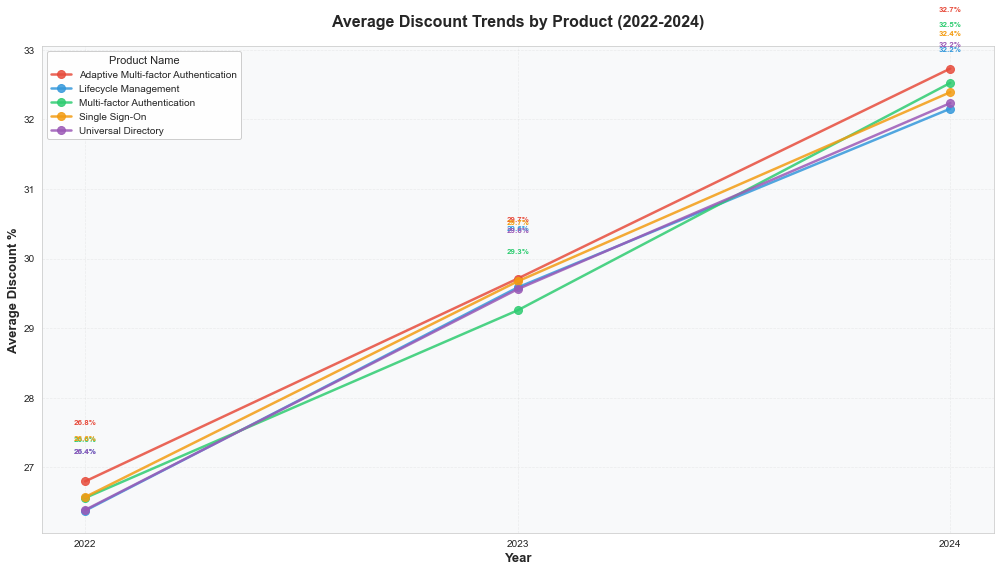


Average Discount % by Product and Year:
Year                                   2022   2023   2024
Product Name                                             
Adaptive Multi-factor Authentication  26.80  29.71  32.73
Lifecycle Management                  26.38  29.59  32.15
Multi-factor Authentication           26.56  29.26  32.52
Single Sign-On                        26.58  29.67  32.39
Universal Directory                   26.39  29.56  32.23


Change from 2022 to 2024 (percentage points):
Product Name
Multi-factor Authentication             5.96
Adaptive Multi-factor Authentication    5.93
Universal Directory                     5.84
Single Sign-On                          5.81
Lifecycle Management                    5.77
dtype: float64


In [12]:
# Analyze discount trends by product over the 3 years
product_year_discounts = data.groupby(['Product Name', 'Year'])['Discount_Percentage'].mean().reset_index()

# Create a beautiful line chart
fig, ax = plt.subplots(figsize=(14, 8))

# Define a color palette for products
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6', 
          '#1abc9c', '#e67e22', '#34495e', '#16a085', '#d35400']

# Plot each product as a separate line
for i, product in enumerate(product_year_discounts['Product Name'].unique()):
    product_data = product_year_discounts[product_year_discounts['Product Name'] == product]
    ax.plot(product_data['Year'], product_data['Discount_Percentage'], 
            marker='o', linewidth=2.5, markersize=8, 
            label=product, color=colors[i % len(colors)], alpha=0.85)
    
    # Add value labels at each point
    for x, y in zip(product_data['Year'], product_data['Discount_Percentage']):
        ax.text(x, y + 0.8, f'{y:.1f}%', ha='center', va='bottom', 
                fontsize=8, fontweight='bold', color=colors[i % len(colors)])

# Styling
ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Average Discount %', fontsize=13, fontweight='bold')
ax.set_title('Average Discount Trends by Product (2022-2024)', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(product_year_discounts['Year'].unique())
ax.legend(title='Product Name', fontsize=10, title_fontsize=11, loc='best', framealpha=0.95)
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
ax.set_axisbelow(True)

# Add background color
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')

plt.tight_layout()
plt.show()

# Print summary table
print("\nAverage Discount % by Product and Year:")
product_year_pivot = product_year_discounts.pivot(index='Product Name', columns='Year', values='Discount_Percentage')
print(product_year_pivot.round(2))
print(f"\n\nChange from 2022 to 2024 (percentage points):")
change = product_year_pivot[2024] - product_year_pivot[2022]
print(change.round(2).sort_values(ascending=False))


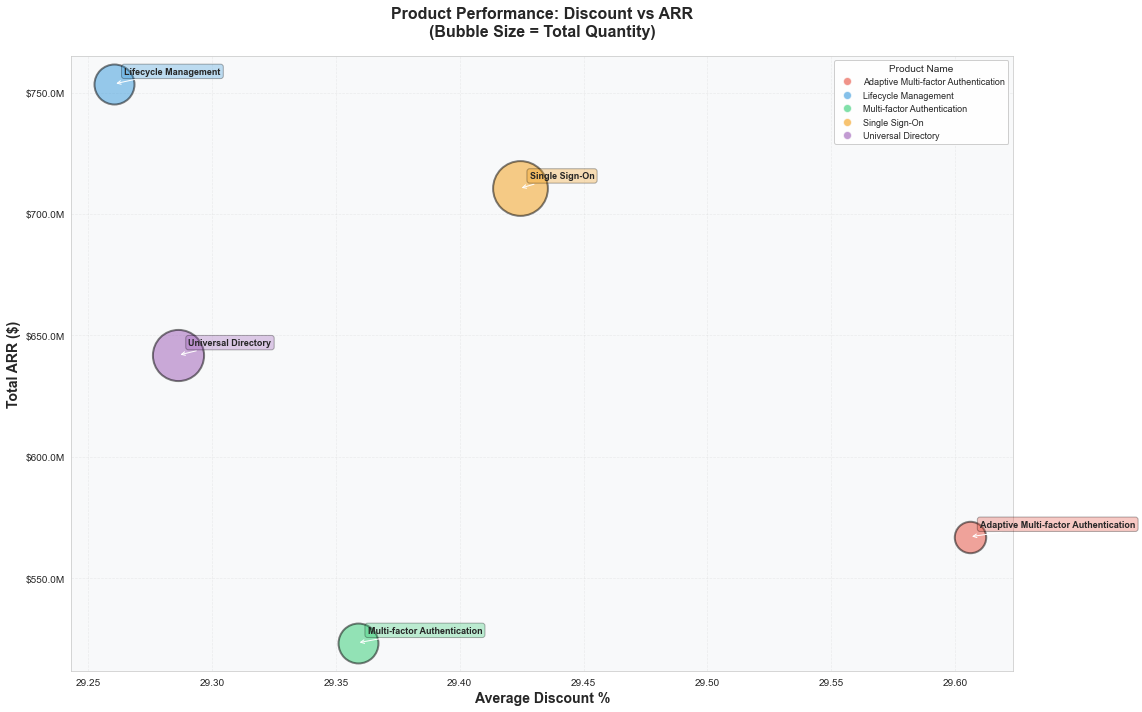


Bubble Chart Data Summary:
                           Product Name  Discount_Percentage        ARR  \
1                  Lifecycle Management                29.26  753584880   
3                        Single Sign-On                29.42  710521560   
4                   Universal Directory                29.29  641870880   
0  Adaptive Multi-factor Authentication                29.61  567075960   
2           Multi-factor Authentication                29.36  523379700   

    Quantity  
1   61226000  
3  122521000  
4  105819000  
0   34459500  
2   60903000  


In [17]:
# Prepare data for bubble chart
bubble_data = data.groupby('Product Name').agg({
    'Discount_Percentage': 'mean',
    'ARR': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Create bubble chart
fig, ax = plt.subplots(figsize=(16, 10))

# Define color palette for products
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6', 
          '#1abc9c', '#e67e22', '#95a5a6', '#16a085', '#d35400']

# Normalize bubble sizes to reasonable range (adjust the divisor for better sizing)
max_quantity = bubble_data['Quantity'].max()
min_size = 200
max_size = 3000

# Create scatter plot (bubble chart)
for i, product in enumerate(bubble_data['Product Name']):
    product_row = bubble_data[bubble_data['Product Name'] == product]
    
    # Normalize bubble size
    normalized_size = min_size + (product_row['Quantity'].values[0] / max_quantity) * (max_size - min_size)
    
    ax.scatter(product_row['Discount_Percentage'], 
               product_row['ARR'], 
               s=normalized_size,
               color=colors[i % len(colors)], 
               alpha=0.5, 
               edgecolors='black', 
               linewidth=2,
               label=product)

# Add product name labels with better positioning
for i, row in bubble_data.iterrows():
    ax.annotate(row['Product Name'], 
                xy=(row['Discount_Percentage'], row['ARR']),
                xytext=(10, 10), 
                textcoords='offset points',
                fontsize=9, 
                fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor=colors[i % len(colors)], alpha=0.3, edgecolor='black'),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', lw=1))

# Styling
ax.set_xlabel('Average Discount %', fontsize=14, fontweight='bold')
ax.set_ylabel('Total ARR ($)', fontsize=14, fontweight='bold')
ax.set_title('Product Performance: Discount vs ARR\n(Bubble Size = Total Quantity)', 
             fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
ax.set_axisbelow(True)

# Format Y-axis as currency
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

# Add background color
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')

# Add legend with bubble size reference
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=product,
                         markerfacecolor=colors[i % len(colors)], markersize=8, alpha=0.6)
                  for i, product in enumerate(bubble_data['Product Name'])]
ax.legend(handles=legend_elements, title='Product Name', fontsize=9, 
          title_fontsize=10, loc='upper right', framealpha=0.95)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nBubble Chart Data Summary:")
print(bubble_data.sort_values('ARR', ascending=False).round(2))


look at list price and deal volume by product
Is lifecycle management a good strategy?

Look at contract length and lifetime value

Initial learnings
- ARR is definitely going down YoY, they seem to over discounting in 2024
- Lifecycle management seems to be a good strategy
- Contract lengeth seems to be similar across products 

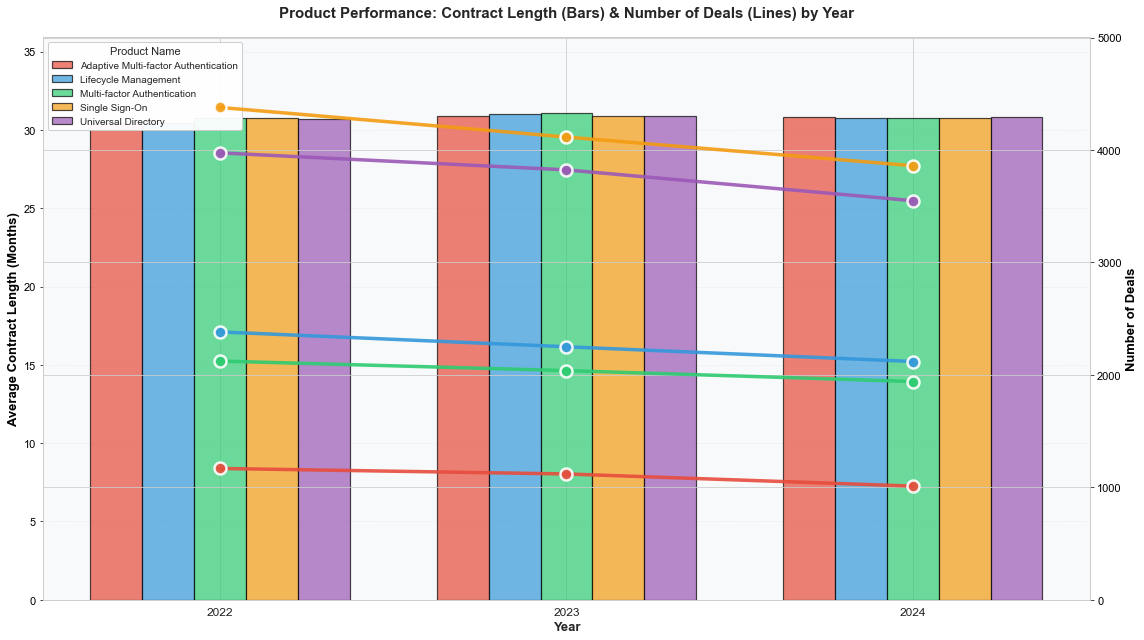


Product Metrics by Year:
                        Product Name  Year  Num_Deals  Avg_Contract_Length
Adaptive Multi-factor Authentication  2022       1168            30.452055
                Lifecycle Management  2022       2382            30.418136
         Multi-factor Authentication  2022       2123            30.737635
                      Single Sign-On  2022       4378            30.745546
                 Universal Directory  2022       3974            30.679416
Adaptive Multi-factor Authentication  2023       1119            30.895442
                Lifecycle Management  2023       2250            30.997333
         Multi-factor Authentication  2023       2038            31.089303
                      Single Sign-On  2023       4115            30.893803
                 Universal Directory  2023       3823            30.896155
Adaptive Multi-factor Authentication  2024       1011            30.836795
                Lifecycle Management  2024       2119            30.750354

In [25]:
# Aggregate metrics by product and year
product_year_metrics = data.groupby(['Product Name', 'Year']).agg({
    'Deal ID': 'nunique',
    'Contract Length': 'mean'
}).reset_index()

product_year_metrics.columns = ['Product Name', 'Year', 'Num_Deals', 'Avg_Contract_Length']

# Create figure with secondary y-axis
fig, ax1 = plt.subplots(figsize=(16, 9))

# Define color palette for products
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']

# Get unique products and years
products = product_year_metrics['Product Name'].unique()
years = sorted(product_year_metrics['Year'].unique())

# Set up bar chart parameters
n_years = len(years)
n_products = len(products)
bar_width = 0.15
group_gap = 0.1

# Create x positions for each year
x_positions = np.arange(n_years)

# Plot bars for Average Contract Length on primary axis (left y-axis)
for i, product in enumerate(products):
    product_data = product_year_metrics[product_year_metrics['Product Name'] == product].sort_values('Year')
    
    # Calculate x position for this product's bars
    offset = (i - n_products/2 + 0.5) * bar_width
    
    # Bar chart for contract length
    bars = ax1.bar(x_positions + offset, product_data['Avg_Contract_Length'], 
                   bar_width, label=product, color=colors[i], 
                   alpha=0.7, edgecolor='black', linewidth=1.2)

# Styling for ax1 (bars - left y-axis)
ax1.set_xlabel('Year', fontsize=13, fontweight='bold')
ax1.set_ylabel('Average Contract Length (Months)', fontsize=13, fontweight='bold', color='black')
ax1.set_xticks(x_positions)
ax1.set_xticklabels(years, fontsize=12)
ax1.tick_params(axis='y', labelcolor='black', labelsize=11)
ax1.set_ylim(0, ax1.get_ylim()[1] * 1.1)  # Add some padding at top
ax1.grid(True, alpha=0.3, linestyle='--', linewidth=0.7, axis='y')
ax1.set_axisbelow(True)
ax1.set_facecolor('#f8f9fa')

# Create secondary y-axis for line chart (right y-axis)
ax2 = ax1.twinx()

# Plot lines for Number of Deals on secondary axis
for i, product in enumerate(products):
    product_data = product_year_metrics[product_year_metrics['Product Name'] == product].sort_values('Year')
    
    # Line chart for number of deals
    ax2.plot(x_positions, product_data['Num_Deals'], 
            marker='o', linewidth=3.5, markersize=12, linestyle='-',
            color=colors[i], alpha=0.9, markeredgecolor='white', markeredgewidth=2.5,
            zorder=5)

# Styling for ax2 (lines - right y-axis)
ax2.set_ylabel('Number of Deals', fontsize=13, fontweight='bold', color='black')
ax2.tick_params(axis='y', labelcolor='black', labelsize=11)
ax2.set_ylim(0, ax2.get_ylim()[1] * 1.1)  # Add some padding at top

# Title
plt.title('Product Performance: Contract Length (Bars) & Number of Deals (Lines) by Year', 
          fontsize=15, fontweight='bold', pad=20)

# Simple legend
ax1.legend(title='Product Name', fontsize=10, title_fontsize=11, 
          loc='upper left', framealpha=0.95)

fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()

# Print summary
print("\nProduct Metrics by Year:")
print(product_year_metrics.sort_values(['Year', 'Product Name']).to_string(index=False))


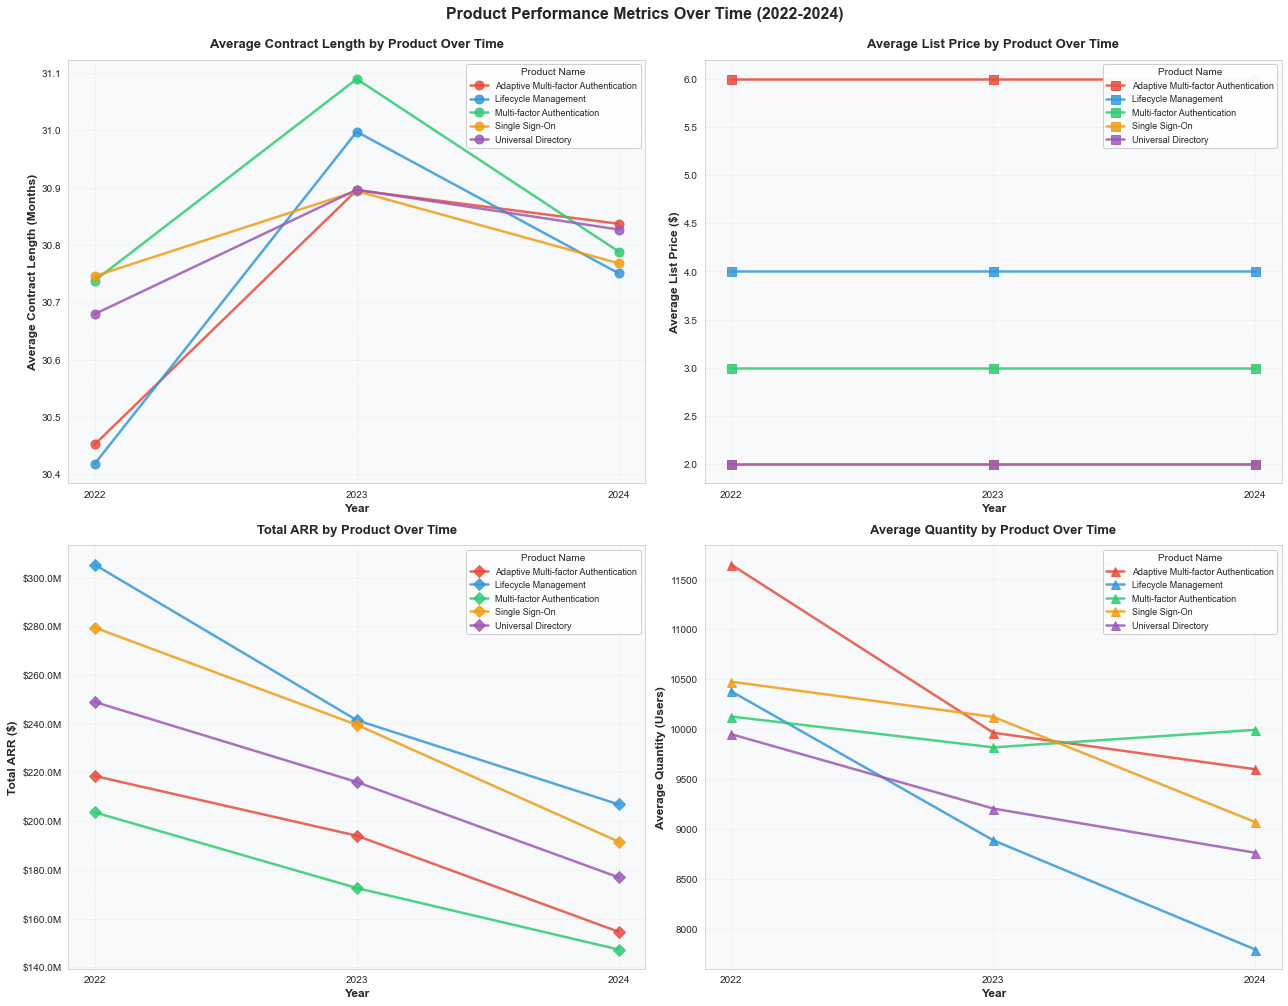


SUMMARY TABLES

1. Average Contract Length (Months):
Year                                   2022   2023   2024
Product Name                                             
Adaptive Multi-factor Authentication  30.45  30.90  30.84
Lifecycle Management                  30.42  31.00  30.75
Multi-factor Authentication           30.74  31.09  30.79
Single Sign-On                        30.75  30.89  30.77
Universal Directory                   30.68  30.90  30.83

2. Average List Price ($):
Year                                  2022  2023  2024
Product Name                                          
Adaptive Multi-factor Authentication   6.0   6.0   6.0
Lifecycle Management                   4.0   4.0   4.0
Multi-factor Authentication            3.0   3.0   3.0
Single Sign-On                         2.0   2.0   2.0
Universal Directory                    2.0   2.0   2.0

3. Total ARR ($):
Year                                          2022          2023          2024
Product Name                 

In [27]:
# Aggregate metrics by product and year
product_year_metrics = data.groupby(['Product Name', 'Year']).agg({
    'Contract Length': 'mean',
    'List Price': 'mean',
    'ARR': 'sum',
    'Quantity': 'mean'
}).reset_index()

product_year_metrics.columns = ['Product Name', 'Year', 'Avg_Contract_Length', 
                                 'Avg_List_Price', 'Total_ARR', 'Avg_Quantity']

# Create 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Define color palette for products
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']

# Get unique products and years
products = product_year_metrics['Product Name'].unique()
years = sorted(product_year_metrics['Year'].unique())

# Plot 1: Average Contract Length per Product per Year
for i, product in enumerate(products):
    product_data = product_year_metrics[product_year_metrics['Product Name'] == product]
    axes[0, 0].plot(product_data['Year'], product_data['Avg_Contract_Length'], 
                    marker='o', linewidth=2.5, markersize=9, 
                    label=product, color=colors[i], alpha=0.85)

axes[0, 0].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Average Contract Length (Months)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Average Contract Length by Product Over Time', fontsize=13, fontweight='bold', pad=12)
axes[0, 0].set_xticks(years)
axes[0, 0].legend(title='Product Name', fontsize=9, title_fontsize=10, loc='best', framealpha=0.95)
axes[0, 0].grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
axes[0, 0].set_facecolor('#f8f9fa')

# Plot 2: Average List Price per Product per Year
for i, product in enumerate(products):
    product_data = product_year_metrics[product_year_metrics['Product Name'] == product]
    axes[0, 1].plot(product_data['Year'], product_data['Avg_List_Price'], 
                    marker='s', linewidth=2.5, markersize=9, 
                    label=product, color=colors[i], alpha=0.85)

axes[0, 1].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Average List Price ($)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Average List Price by Product Over Time', fontsize=13, fontweight='bold', pad=12)
axes[0, 1].set_xticks(years)
axes[0, 1].legend(title='Product Name', fontsize=9, title_fontsize=10, loc='best', framealpha=0.95)
axes[0, 1].grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
axes[0, 1].set_facecolor('#f8f9fa')

# Plot 3: Total ARR per Product per Year
for i, product in enumerate(products):
    product_data = product_year_metrics[product_year_metrics['Product Name'] == product]
    axes[1, 0].plot(product_data['Year'], product_data['Total_ARR'], 
                    marker='D', linewidth=2.5, markersize=9, 
                    label=product, color=colors[i], alpha=0.85)

axes[1, 0].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Total ARR ($)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Total ARR by Product Over Time', fontsize=13, fontweight='bold', pad=12)
axes[1, 0].set_xticks(years)
axes[1, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
axes[1, 0].legend(title='Product Name', fontsize=9, title_fontsize=10, loc='best', framealpha=0.95)
axes[1, 0].grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
axes[1, 0].set_facecolor('#f8f9fa')

# Plot 4: Average Quantity per Product per Year
for i, product in enumerate(products):
    product_data = product_year_metrics[product_year_metrics['Product Name'] == product]
    axes[1, 1].plot(product_data['Year'], product_data['Avg_Quantity'], 
                    marker='^', linewidth=2.5, markersize=9, 
                    label=product, color=colors[i], alpha=0.85)

axes[1, 1].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Average Quantity (Users)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Average Quantity by Product Over Time', fontsize=13, fontweight='bold', pad=12)
axes[1, 1].set_xticks(years)
axes[1, 1].legend(title='Product Name', fontsize=9, title_fontsize=10, loc='best', framealpha=0.95)
axes[1, 1].grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
axes[1, 1].set_facecolor('#f8f9fa')

fig.patch.set_facecolor('white')
plt.suptitle('Product Performance Metrics Over Time (2022-2024)', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Print summary tables
print("\n" + "="*100)
print("SUMMARY TABLES")
print("="*100)

print("\n1. Average Contract Length (Months):")
pivot_contract = product_year_metrics.pivot(index='Product Name', columns='Year', values='Avg_Contract_Length')
print(pivot_contract.round(2))

print("\n2. Average List Price ($):")
pivot_price = product_year_metrics.pivot(index='Product Name', columns='Year', values='Avg_List_Price')
print(pivot_price.round(2))

print("\n3. Total ARR ($):")
pivot_arr = product_year_metrics.pivot(index='Product Name', columns='Year', values='Total_ARR')
print(pivot_arr.applymap(lambda x: f'${x:,.0f}'))

print("\n4. Average Quantity (Users):")
pivot_qty = product_year_metrics.pivot(index='Product Name', columns='Year', values='Avg_Quantity')
print(pivot_qty.round(0))


Chart 1: Discount Heatmap by Region and Sales Segment


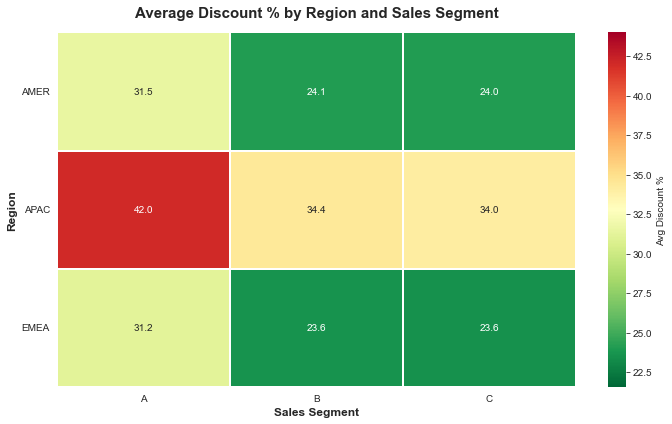

Sales Segment      A      B      C
Region                            
AMER           31.49  24.07  24.03
APAC           42.00  34.38  34.02
EMEA           31.18  23.62  23.57


In [28]:
# 1. HEATMAP: Discount Percentage by Region and Sales Segment
print("Chart 1: Discount Heatmap by Region and Sales Segment")
print("="*80)

# Calculate average discount by region and sales segment
heatmap_data = data.groupby(['Region', 'Sales Segment'])['Discount_Percentage'].mean().unstack()

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='RdYlGn_r', 
            linewidths=2, linecolor='white', cbar_kws={'label': 'Avg Discount %'},
            vmin=heatmap_data.min().min()-2, vmax=heatmap_data.max().max()+2)
plt.title('Average Discount % by Region and Sales Segment', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Sales Segment', fontsize=12, fontweight='bold')
plt.ylabel('Region', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print(heatmap_data.round(2))



Chart 2: ARR Growth by Region Over Time (Stacked Area)


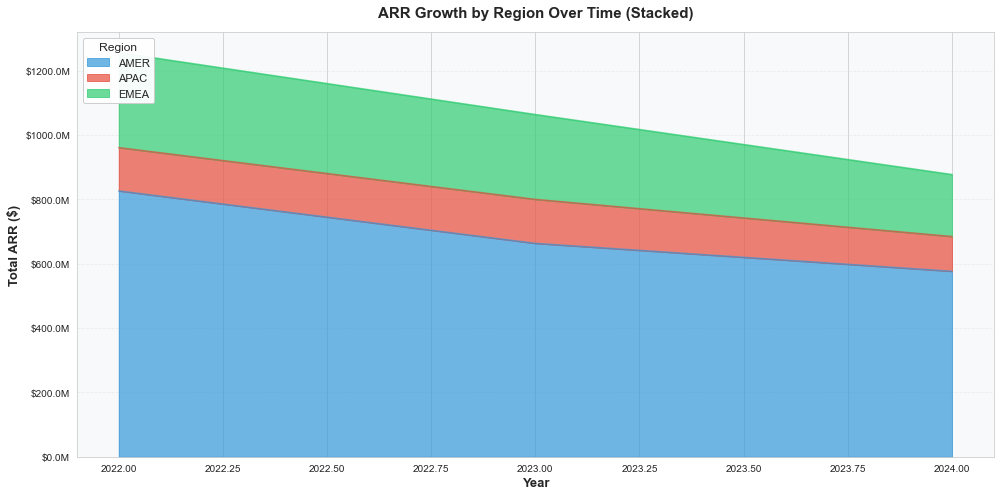


ARR by Region and Year:
Region       AMER       APAC       EMEA
Year                                   
2022    826119540  134549520  295127580
2023    663168180  136675140  263740080
2024    576387000  108118020  192547920


In [29]:
# 2. AREA CHART: ARR Growth by Region Over Time
print("\nChart 2: ARR Growth by Region Over Time (Stacked Area)")
print("="*80)

# Calculate ARR by region and year
region_year_arr = data.groupby(['Year', 'Region'])['ARR'].sum().unstack(fill_value=0)

# Create stacked area chart
fig, ax = plt.subplots(figsize=(14, 7))
region_year_arr.plot(kind='area', stacked=True, ax=ax, 
                     color=['#3498db', '#e74c3c', '#2ecc71'], alpha=0.7)

ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Total ARR ($)', fontsize=13, fontweight='bold')
ax.set_title('ARR Growth by Region Over Time (Stacked)', fontsize=15, fontweight='bold', pad=15)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
ax.legend(title='Region', fontsize=11, title_fontsize=12, loc='upper left', framealpha=0.95)
ax.grid(True, alpha=0.3, linestyle='--', axis='y')
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()

print("\nARR by Region and Year:")
print(region_year_arr)



Chart 3: Discount Distribution by Sales Segment (Violin Plot)


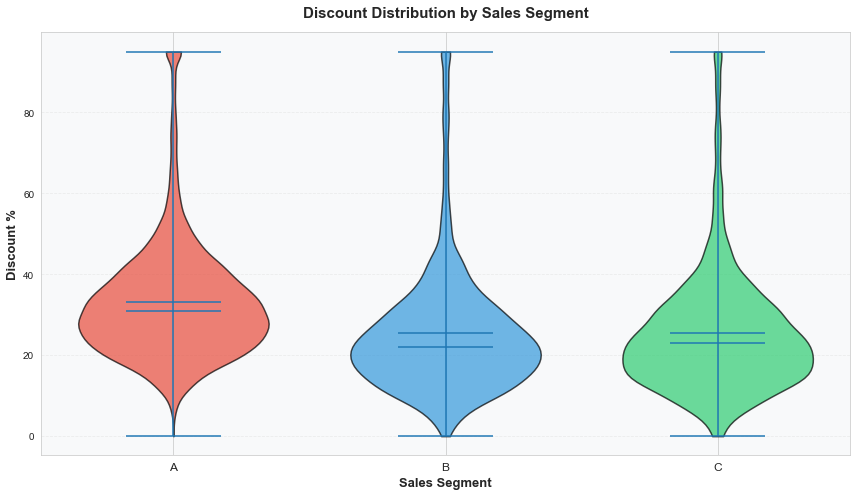


Discount Statistics by Sales Segment:
                 count   mean    std  min   25%   50%   75%   max
Sales Segment                                                    
A              20341.0  33.10  14.61  0.0  24.0  31.0  39.0  95.0
B              11370.0  25.46  15.77  0.0  16.0  22.0  31.0  95.0
C               8139.0  25.47  15.40  0.0  15.0  23.0  31.0  95.0


In [30]:
# 3. VIOLIN PLOT: Discount Distribution by Sales Segment
print("\nChart 3: Discount Distribution by Sales Segment (Violin Plot)")
print("="*80)

fig, ax = plt.subplots(figsize=(12, 7))
parts = ax.violinplot([data[data['Sales Segment'] == seg]['Discount_Percentage'].values 
                       for seg in sorted(data['Sales Segment'].unique())],
                      positions=range(len(data['Sales Segment'].unique())),
                      widths=0.7,
                      showmeans=True,
                      showmedians=True)

# Color the violin plots
colors = ['#e74c3c', '#3498db', '#2ecc71']
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i % len(colors)])
    pc.set_alpha(0.7)
    pc.set_edgecolor('black')
    pc.set_linewidth(1.5)

ax.set_xticks(range(len(data['Sales Segment'].unique())))
ax.set_xticklabels(sorted(data['Sales Segment'].unique()), fontsize=12)
ax.set_xlabel('Sales Segment', fontsize=13, fontweight='bold')
ax.set_ylabel('Discount %', fontsize=13, fontweight='bold')
ax.set_title('Discount Distribution by Sales Segment', fontsize=15, fontweight='bold', pad=15)
ax.grid(True, alpha=0.3, linestyle='--', axis='y')
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()

# Print statistics
print("\nDiscount Statistics by Sales Segment:")
print(data.groupby('Sales Segment')['Discount_Percentage'].describe().round(2))



Chart 4: ARR Distribution by Region and Product (Nested Pie)


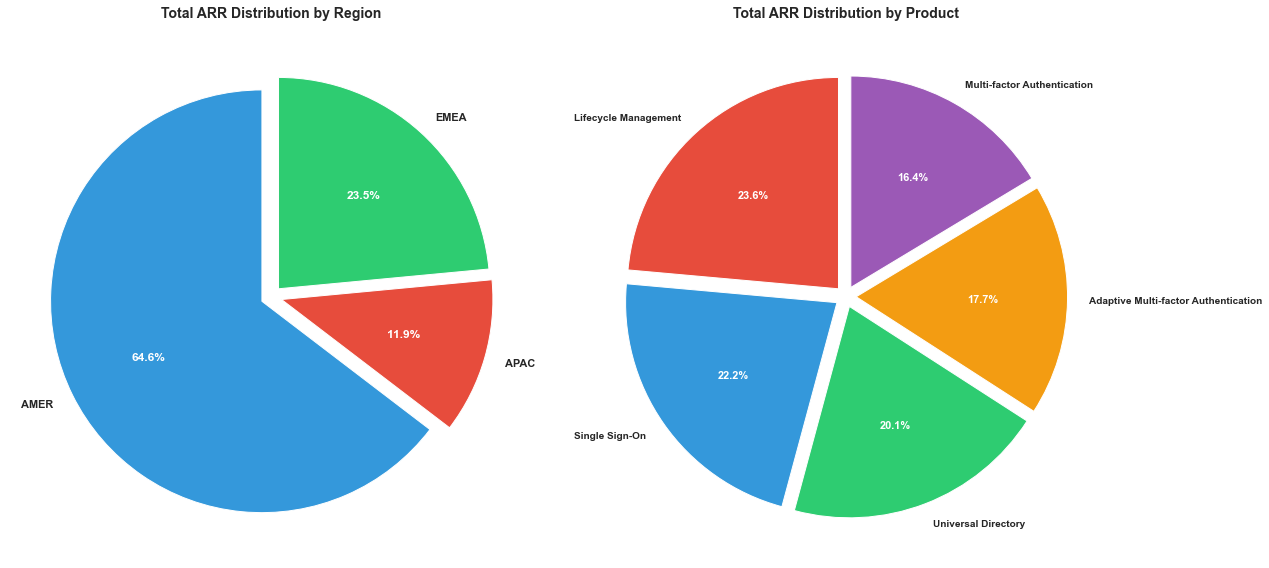


ARR by Region:
Region
AMER    $2,065,674,720
APAC      $379,342,680
EMEA      $751,415,580
Name: ARR, dtype: object

ARR by Product:
Product Name
Lifecycle Management                    $753,584,880
Single Sign-On                          $710,521,560
Universal Directory                     $641,870,880
Adaptive Multi-factor Authentication    $567,075,960
Multi-factor Authentication             $523,379,700
Name: ARR, dtype: object


In [31]:
# 4. SUNBURST-STYLE PIE CHART: ARR Distribution by Region and Product
print("\nChart 4: ARR Distribution by Region and Product (Nested Pie)")
print("="*80)

# Calculate ARR by region and product
region_product_arr = data.groupby(['Region', 'Product Name'])['ARR'].sum()

# Outer ring: by Region
region_arr = data.groupby('Region')['ARR'].sum()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Pie 1: ARR by Region
colors_region = ['#3498db', '#e74c3c', '#2ecc71']
wedges1, texts1, autotexts1 = ax1.pie(region_arr, labels=region_arr.index, autopct='%1.1f%%',
                                       colors=colors_region, startangle=90,
                                       textprops={'fontsize': 11, 'fontweight': 'bold'},
                                       explode=[0.05]*len(region_arr))

for autotext in autotexts1:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

ax1.set_title('Total ARR Distribution by Region', fontsize=14, fontweight='bold', pad=15)

# Pie 2: ARR by Product
product_arr = data.groupby('Product Name')['ARR'].sum().sort_values(ascending=False)
colors_product = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']
wedges2, texts2, autotexts2 = ax2.pie(product_arr, labels=product_arr.index, autopct='%1.1f%%',
                                       colors=colors_product, startangle=90,
                                       textprops={'fontsize': 10, 'fontweight': 'bold'},
                                       explode=[0.05]*len(product_arr))

for autotext in autotexts2:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

ax2.set_title('Total ARR Distribution by Product', fontsize=14, fontweight='bold', pad=15)

fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()

print("\nARR by Region:")
print(region_arr.apply(lambda x: f'${x:,.0f}'))
print("\nARR by Product:")
print(product_arr.apply(lambda x: f'${x:,.0f}'))



Chart 5: Contract Length Distribution by Year


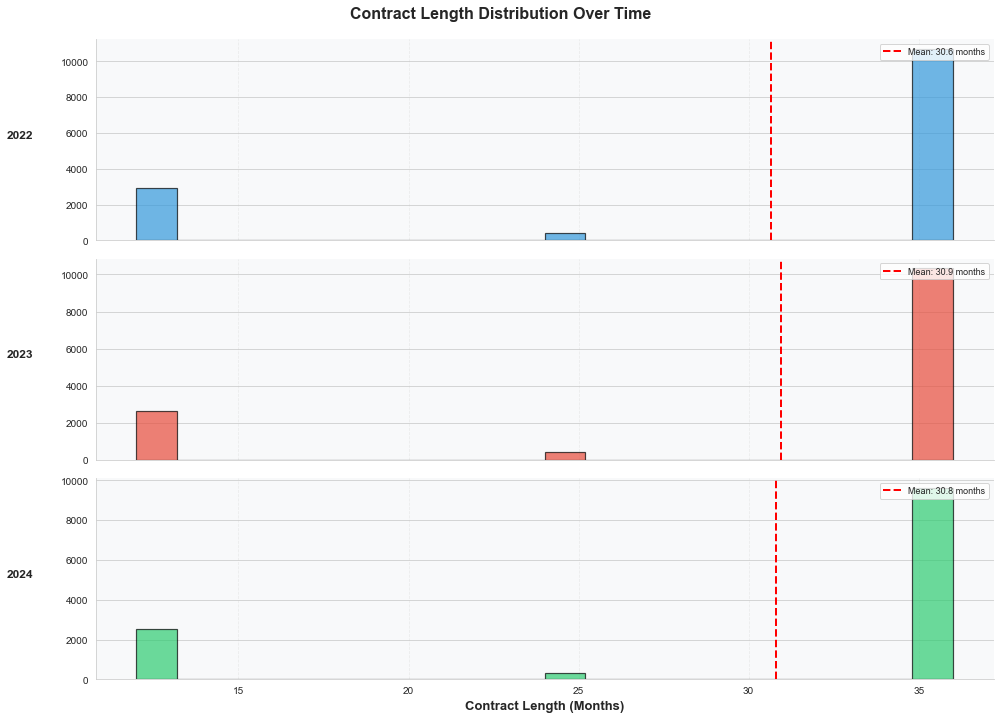

In [32]:
# 5. RIDGELINE-STYLE PLOT: Contract Length Distribution by Year
print("\nChart 5: Contract Length Distribution by Year")
print("="*80)

years = sorted(data['Year'].unique())
fig, axes = plt.subplots(len(years), 1, figsize=(14, 10), sharex=True)

colors_year = ['#3498db', '#e74c3c', '#2ecc71']

for i, year in enumerate(years):
    year_data = data[data['Year'] == year]['Contract Length']
    
    # Create histogram
    axes[i].hist(year_data, bins=20, color=colors_year[i], alpha=0.7, 
                edgecolor='black', linewidth=1.2)
    axes[i].set_ylabel(f'{year}', fontsize=12, fontweight='bold', rotation=0, labelpad=40)
    axes[i].set_facecolor('#f8f9fa')
    axes[i].grid(True, alpha=0.3, linestyle='--', axis='x')
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    
    # Add mean line
    mean_val = year_data.mean()
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                   label=f'Mean: {mean_val:.1f} months')
    axes[i].legend(loc='upper right', fontsize=9)

axes[-1].set_xlabel('Contract Length (Months)', fontsize=13, fontweight='bold')
fig.suptitle('Contract Length Distribution Over Time', fontsize=16, fontweight='bold', y=0.995)
fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()



Chart 6: Discount vs Quantity - Deal Size Impact


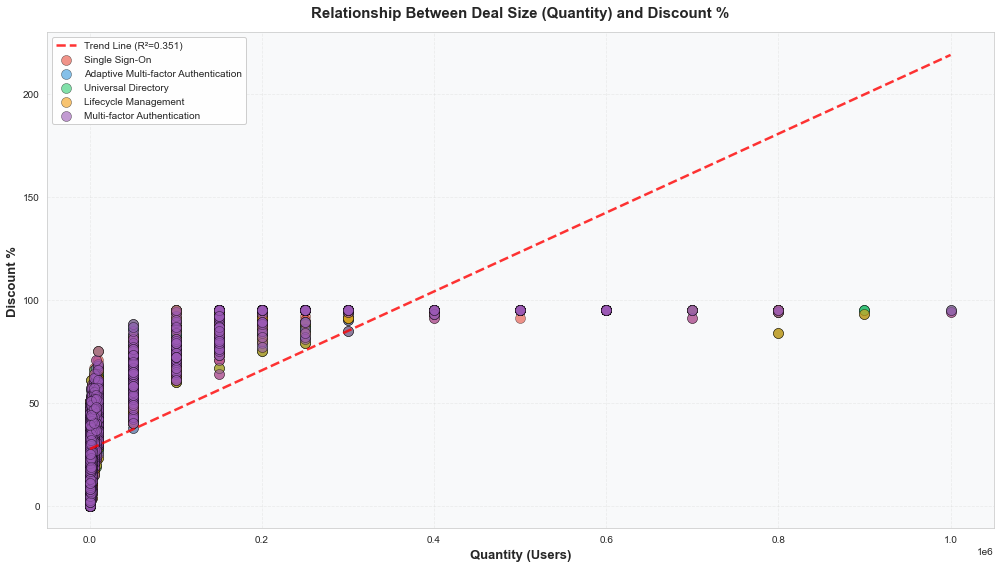


Correlation between Quantity and Discount: 0.592


In [33]:
# 6. SCATTER PLOT: Discount vs Quantity (Deal Size Impact)
print("\nChart 6: Discount vs Quantity - Deal Size Impact")
print("="*80)

fig, ax = plt.subplots(figsize=(14, 8))

# Create scatter plot colored by product
products = data['Product Name'].unique()
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']

for i, product in enumerate(products):
    product_data = data[data['Product Name'] == product]
    ax.scatter(product_data['Quantity'], product_data['Discount_Percentage'],
              s=100, alpha=0.6, color=colors[i], edgecolors='black', linewidth=0.5,
              label=product)

# Add trend line
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(data['Quantity'], data['Discount_Percentage'])
x_trend = np.linspace(data['Quantity'].min(), data['Quantity'].max(), 100)
y_trend = slope * x_trend + intercept
ax.plot(x_trend, y_trend, 'r--', linewidth=2.5, alpha=0.8, 
        label=f'Trend Line (R²={r_value**2:.3f})')

ax.set_xlabel('Quantity (Users)', fontsize=13, fontweight='bold')
ax.set_ylabel('Discount %', fontsize=13, fontweight='bold')
ax.set_title('Relationship Between Deal Size (Quantity) and Discount %', 
            fontsize=15, fontweight='bold', pad=15)
ax.legend(fontsize=10, loc='best', framealpha=0.95)
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()

print(f"\nCorrelation between Quantity and Discount: {data[['Quantity', 'Discount_Percentage']].corr().iloc[0,1]:.3f}")


# 2. Linear Regression

In [37]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39850 entries, 0 to 39849
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deal ID                39850 non-null  object 
 1   Year                   39850 non-null  int64  
 2   Region                 39850 non-null  object 
 3   Sales Segment          39850 non-null  object 
 4   Contract Length        39850 non-null  int64  
 5   Product Name           39850 non-null  object 
 6   Quantity               39850 non-null  int64  
 7   List Price             39850 non-null  int64  
 8   Total List Price       39850 non-null  int64  
 9   ARR                    39850 non-null  int64  
 10  Annualized_List_Price  39850 non-null  float64
 11  Discount_Amount        39850 non-null  float64
 12  Discount_Percentage    39850 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 4.0+ MB


In [38]:
data.nunique()

Deal ID                  14769
Year                         3
Region                       3
Sales Segment                3
Contract Length              3
Product Name                 5
Quantity                    19
List Price                   4
Total List Price            67
ARR                        698
Annualized_List_Price       43
Discount_Amount            791
Discount_Percentage         96
dtype: int64

In [39]:
data.head()

,Deal ID,Year,Region,Sales Segment,Contract Length,Product Name,Quantity,List Price,Total List Price,ARR,Annualized_List_Price,Discount_Amount,Discount_Percentage
0,00163VHH30WYN4JY,2022,AMER,C,36,Single Sign-On,2500,2,180000,41400,60000.0,18600.0,31.0
1,00163VHH30WYN4JY,2022,AMER,C,36,Adaptive Multi-factor Authentication,2500,6,540000,124200,180000.0,55800.0,31.0
2,004YLID3WUAUI08F,2022,AMER,A,12,Single Sign-On,1000,2,24000,16800,24000.0,7200.0,30.0
3,004YLID3WUAUI08F,2022,AMER,A,12,Universal Directory,1000,2,24000,16800,24000.0,7200.0,30.0
4,004YLID3WUAUI08F,2022,AMER,A,12,Lifecycle Management,1000,4,48000,33600,48000.0,14400.0,30.0


In [40]:
data.groupby('Deal ID').agg('count')

,Year,Region,Sales Segment,Contract Length,Product Name,Quantity,List Price,Total List Price,ARR,Annualized_List_Price,Discount_Amount,Discount_Percentage
Deal ID,,,,,,,,,,,,
0011LYHVAURRAGZP,4,4,4,4,4,4,4,4,4,4,4,4
00163VHH30WYN4JY,2,2,2,2,2,2,2,2,2,2,2,2
004YLID3WUAUI08F,3,3,3,3,3,3,3,3,3,3,3,3
0094RE9EL8OIZ6ED,4,4,4,4,4,4,4,4,4,4,4,4
00ADHPCYR6S1PKDA,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
ZZSOYNJAW2TLBX6L,4,4,4,4,4,4,4,4,4,4,4,4
ZZUE3U2J1QI2V2CU,3,3,3,3,3,3,3,3,3,3,3,3
ZZUP0E1A51587A16,3,3,3,3,3,3,3,3,3,3,3,3


In [42]:
data[data['Deal ID'] == '0011LYHVAURRAGZP']


,Deal ID,Year,Region,Sales Segment,Contract Length,Product Name,Quantity,List Price,Total List Price,ARR,Annualized_List_Price,Discount_Amount,Discount_Percentage
27370,0011LYHVAURRAGZP,2024,AMER,A,36,Single Sign-On,1000,2,72000,15600,24000.0,8400.0,35.0
27371,0011LYHVAURRAGZP,2024,AMER,A,36,Universal Directory,1000,2,72000,15600,24000.0,8400.0,35.0
27372,0011LYHVAURRAGZP,2024,AMER,A,36,Multi-factor Authentication,1000,3,108000,23400,36000.0,12600.0,35.0
27373,0011LYHVAURRAGZP,2024,AMER,A,36,Lifecycle Management,1000,4,144000,31200,48000.0,16800.0,35.0


In [60]:
data_grouped=data.groupby(['Deal ID']).agg({
    'Year':'nunique',
    'Region':'nunique',
    'Sales Segment':'nunique',
    'Contract Length':'nunique',
    'Quantity':'nunique',
    'Discount_Percentage':'nunique'})
data_grouped.sum()

Year                   14769
Region                 14769
Sales Segment          14769
Contract Length        14769
Quantity               14769
Discount_Percentage    14769
dtype: int64

In [63]:
# Prepare data for linear regression model to predict discount percentage per deal

# First, aggregate data at the deal level (one discount per deal)
deal_level_data = data.groupby('Deal ID').agg({
    'Year': 'first',
    'Region': 'first',
    'Sales Segment': 'first',
    'Contract Length': 'first',
    'Discount_Percentage': 'mean',  # Average discount across products in the deal
    'Quantity': 'sum',  # Total quantity across all products in deal
    'List Price': 'mean',  # Average list price in the deal
    'Total List Price': 'sum',  # Total list price for the deal
    'ARR': 'sum'  # Total ARR for the deal
}).reset_index()

# Create binary flags for each product per deal
product_flag_data = pd.get_dummies(data[['Deal ID', 'Product Name']], columns=['Product Name'], dtype=int)

# Group by Deal ID to get one row per deal (aggregate the dummy variables)
product_flag_data = product_flag_data.groupby('Deal ID').max().reset_index()

# Join product flags to deal-level data
deal_level_data = deal_level_data.merge(product_flag_data, on='Deal ID', how='left')

print("Deal-Level Data with Product Flags:")
print(f"Total Deals: {len(deal_level_data)}")
deal_level_data.head()

Deal-Level Data with Product Flags:
Total Deals: 14769


,Deal ID,Year,Region,Sales Segment,Contract Length,Discount_Percentage,Quantity,List Price,Total List Price,ARR,Product Name_Adaptive Multi-factor Authentication,Product Name_Lifecycle Management,Product Name_Multi-factor Authentication,Product Name_Single Sign-On,Product Name_Universal Directory
0,0011LYHVAURRAGZP,2024,AMER,A,36,35.0,4000,2.750000,396000,85800,0,1,1,1,1
1,00163VHH30WYN4JY,2022,AMER,C,36,31.0,5000,4.000000,720000,165600,1,0,0,1,0
2,004YLID3WUAUI08F,2022,AMER,A,12,30.0,3000,2.666667,96000,67200,0,1,0,1,1
3,0094RE9EL8OIZ6ED,2022,AMER,A,36,23.0,2000,2.750000,198000,50820,0,1,1,1,1
4,00ADHPCYR6S1PKDA,2024,EMEA,A,36,37.0,1000,2.500000,90000,18900,0,0,1,0,1


In [64]:
# Build Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Prepare features and target
# Convert categorical variables to dummy variables
deal_model_data = deal_level_data.copy()

# Create dummy variables for categorical features
deal_model_data = pd.get_dummies(deal_model_data, columns=['Region', 'Sales Segment'], 
                                  drop_first=True, dtype=int)

# Select features for the model
feature_columns = [col for col in deal_model_data.columns 
                  if col not in ['Deal ID', 'Discount_Percentage', 'Total_ARR']]

X = deal_model_data[feature_columns]
y = deal_model_data['Discount_Percentage']

print("Features used in the model:")
print(feature_columns)
print(f"\nFeature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")


Features used in the model:
['Year', 'Contract Length', 'Quantity', 'List Price', 'Total List Price', 'ARR', 'Product Name_Adaptive Multi-factor Authentication', 'Product Name_Lifecycle Management', 'Product Name_Multi-factor Authentication', 'Product Name_Single Sign-On', 'Product Name_Universal Directory', 'Region_APAC', 'Region_EMEA', 'Sales Segment_B', 'Sales Segment_C']

Feature matrix shape: (14769, 15)
Target variable shape: (14769,)


In [65]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Scale features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

# Evaluate model performance
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("\n" + "="*80)
print("MODEL PERFORMANCE METRICS")
print("="*80)
print(f"\nTraining Set:")
print(f"  R² Score: {train_r2:.4f}")
print(f"  RMSE: {train_rmse:.4f}%")
print(f"  MAE: {train_mae:.4f}%")

print(f"\nTest Set:")
print(f"  R² Score: {test_r2:.4f}")
print(f"  RMSE: {test_rmse:.4f}%")
print(f"  MAE: {test_mae:.4f}%")

print(f"\nModel Intercept: {lr_model.intercept_:.4f}")


Training set size: 11815
Test set size: 2954

MODEL PERFORMANCE METRICS

Training Set:
  R² Score: 0.5868
  RMSE: 10.0661%
  MAE: 7.2642%

Test Set:
  R² Score: 0.5920
  RMSE: 10.0363%
  MAE: 7.2081%

Model Intercept: 29.3808



FEATURE IMPORTANCE (Coefficients)
                                          Feature  Coefficient
                                              ARR     7.541258
                                      Region_APAC     4.210751
                                  Sales Segment_B    -4.019813
                                  Sales Segment_C    -3.561479
                                         Quantity     3.163872
                                             Year     2.700377
                                  Contract Length     1.266453
                Product Name_Lifecycle Management    -0.916326
Product Name_Adaptive Multi-factor Authentication    -0.872104
         Product Name_Multi-factor Authentication    -0.629722
                 Product Name_Universal Directory    -0.627889
                                 Total List Price     0.577010
                      Product Name_Single Sign-On    -0.360807
                                      Region_EMEA     0.074490
                    

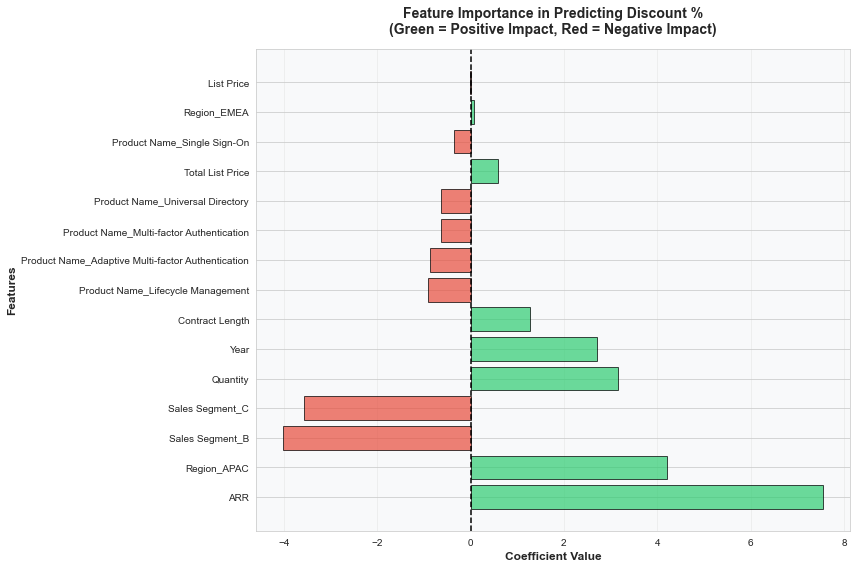

In [66]:
# Feature Importance Analysis
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\n" + "="*80)
print("FEATURE IMPORTANCE (Coefficients)")
print("="*80)
print(feature_importance.to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(12, 8))
colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in feature_importance['Coefficient']]
bars = plt.barh(range(len(feature_importance)), feature_importance['Coefficient'], 
                color=colors, alpha=0.7, edgecolor='black', linewidth=1)

plt.yticks(range(len(feature_importance)), feature_importance['Feature'], fontsize=10)
plt.xlabel('Coefficient Value', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Feature Importance in Predicting Discount %\n(Green = Positive Impact, Red = Negative Impact)', 
          fontsize=14, fontweight='bold', pad=15)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5)
plt.grid(True, alpha=0.3, axis='x')
plt.gca().set_facecolor('#f8f9fa')
plt.gcf().patch.set_facecolor('white')
plt.tight_layout()
plt.show()


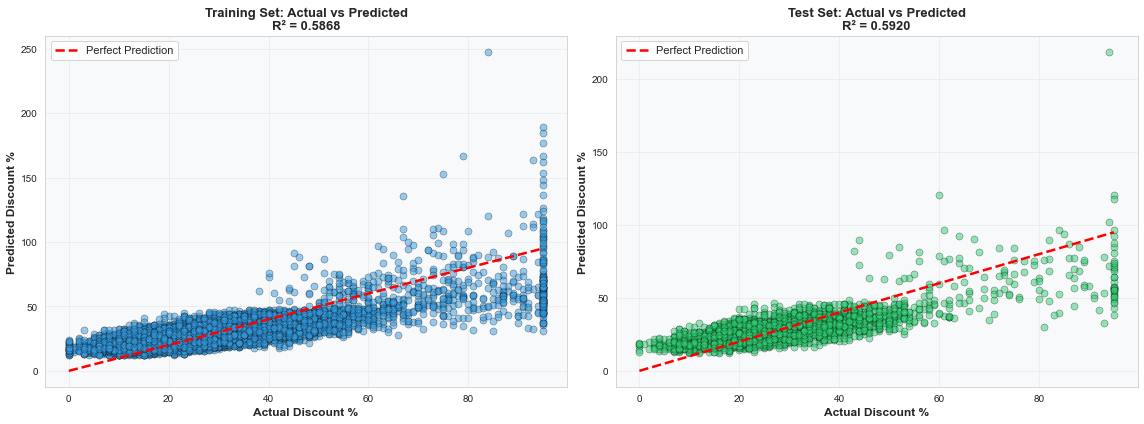

In [67]:
# Visualize Actual vs Predicted
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Training Set
axes[0].scatter(y_train, y_train_pred, alpha=0.5, s=50, color='#3498db', edgecolors='black', linewidth=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
            'r--', linewidth=2.5, label='Perfect Prediction')
axes[0].set_xlabel('Actual Discount %', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Predicted Discount %', fontsize=12, fontweight='bold')
axes[0].set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}', 
                 fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_facecolor('#f8f9fa')

# Plot 2: Test Set
axes[1].scatter(y_test, y_test_pred, alpha=0.5, s=50, color='#2ecc71', edgecolors='black', linewidth=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
            'r--', linewidth=2.5, label='Perfect Prediction')
axes[1].set_xlabel('Actual Discount %', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Predicted Discount %', fontsize=12, fontweight='bold')
axes[1].set_title(f'Test Set: Actual vs Predicted\nR² = {test_r2:.4f}', 
                 fontsize=13, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_facecolor('#f8f9fa')

fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()


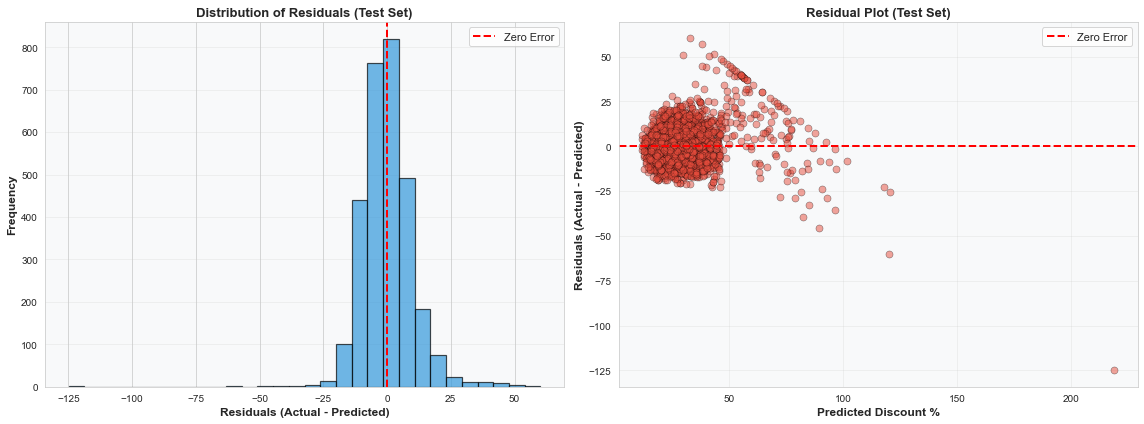


Residual Statistics (Test Set):
Mean Residual: 0.2196%
Std Dev of Residuals: 10.0356%


In [68]:
# Residual Analysis
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Residual Distribution
axes[0].hist(residuals_test, bins=30, color='#3498db', alpha=0.7, edgecolor='black', linewidth=1.2)
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[0].set_xlabel('Residuals (Actual - Predicted)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Residuals (Test Set)', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_facecolor('#f8f9fa')

# Plot 2: Residuals vs Predicted
axes[1].scatter(y_test_pred, residuals_test, alpha=0.5, s=50, color='#e74c3c', 
               edgecolors='black', linewidth=0.5)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[1].set_xlabel('Predicted Discount %', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Residuals (Actual - Predicted)', fontsize=12, fontweight='bold')
axes[1].set_title('Residual Plot (Test Set)', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_facecolor('#f8f9fa')

fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()

print("\nResidual Statistics (Test Set):")
print(f"Mean Residual: {residuals_test.mean():.4f}%")
print(f"Std Dev of Residuals: {residuals_test.std():.4f}%")


## Trying to fix bad residuals

In [70]:
# SOLUTION 1: Check for and handle outliers
print("Checking for outliers in target variable:")
print(deal_level_data['Discount_Percentage'].describe())

# First, check what columns are available
print("\nAvailable columns in deal_level_data:")
print(deal_level_data.columns.tolist())

# Identify extreme discounts
extreme_discounts = deal_level_data[
    (deal_level_data['Discount_Percentage'] < deal_level_data['Discount_Percentage'].quantile(0.01)) | 
    (deal_level_data['Discount_Percentage'] > deal_level_data['Discount_Percentage'].quantile(0.99))
]
print(f"\nNumber of extreme discount deals: {len(extreme_discounts)}")

# Show extreme discounts with available columns
if len(extreme_discounts) > 0:
    print("\nExtreme discount deals:")
    print(extreme_discounts[['Deal ID', 'Discount_Percentage', 'Quantity', 'ARR']].head(10))

# Option: Remove extreme outliers (use cautiously)
deal_level_data_clean = deal_level_data[
    (deal_level_data['Discount_Percentage'] >= deal_level_data['Discount_Percentage'].quantile(0.01)) & 
    (deal_level_data['Discount_Percentage'] <= deal_level_data['Discount_Percentage'].quantile(0.99))
].copy()

print(f"\nOriginal dataset size: {len(deal_level_data)}")
print(f"Cleaned dataset size: {len(deal_level_data_clean)}")
print(f"Removed {len(deal_level_data) - len(deal_level_data_clean)} outlier deals")


Checking for outliers in target variable:
count    14769.000000
mean        29.407407
std         15.671019
min          0.000000
25%         19.000000
50%         27.000000
75%         36.000000
max         95.000000
Name: Discount_Percentage, dtype: float64

Available columns in deal_level_data:
['Deal ID', 'Year', 'Region', 'Sales Segment', 'Contract Length', 'Discount_Percentage', 'Quantity', 'List Price', 'Total List Price', 'ARR', 'Product Name_Adaptive Multi-factor Authentication', 'Product Name_Lifecycle Management', 'Product Name_Multi-factor Authentication', 'Product Name_Single Sign-On', 'Product Name_Universal Directory']

Number of extreme discount deals: 128

Extreme discount deals:
               Deal ID  Discount_Percentage  Quantity    ARR
402   0Z3XFEUCQGUTD7O0                  4.0      1500  40320
416   118QFSH1XQISP0CQ                  3.0      1000  34920
674   1PUUDMQUGYLQGZ4S                  2.0      1500  47040
731   1TTMQP6WXUON6GU1                  0.0      1

In [71]:
# Build Linear Regression Model with outlier-removed dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Prepare features and target using cleaned data
deal_model_data_clean = deal_level_data_clean.copy()

# Create dummy variables for Region and Sales Segment
deal_model_data_clean = pd.get_dummies(deal_model_data_clean, columns=['Region', 'Sales Segment'], 
                                        drop_first=True, dtype=int)

# Select features for the model (exclude Deal ID, Discount_Percentage, and ARR)
feature_columns = [col for col in deal_model_data_clean.columns 
                  if col not in ['Deal ID', 'Discount_Percentage', 'ARR']]

X = deal_model_data_clean[feature_columns]
y = deal_model_data_clean['Discount_Percentage']

print("Features used in the cleaned model:")
print(feature_columns)
print(f"\nFeature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")


Features used in the cleaned model:
['Year', 'Contract Length', 'Quantity', 'List Price', 'Total List Price', 'Product Name_Adaptive Multi-factor Authentication', 'Product Name_Lifecycle Management', 'Product Name_Multi-factor Authentication', 'Product Name_Single Sign-On', 'Product Name_Universal Directory', 'Region_APAC', 'Region_EMEA', 'Sales Segment_B', 'Sales Segment_C']

Feature matrix shape: (14641, 14)
Target variable shape: (14641,)


In [72]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Scale features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the linear regression model
lr_model_clean = LinearRegression()
lr_model_clean.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = lr_model_clean.predict(X_train_scaled)
y_test_pred = lr_model_clean.predict(X_test_scaled)

# Evaluate model performance
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("\n" + "="*80)
print("MODEL PERFORMANCE METRICS (OUTLIERS REMOVED)")
print("="*80)
print(f"\nTraining Set:")
print(f"  R² Score: {train_r2:.4f}")
print(f"  RMSE: {train_rmse:.4f}%")
print(f"  MAE: {train_mae:.4f}%")

print(f"\nTest Set:")
print(f"  R² Score: {test_r2:.4f}")
print(f"  RMSE: {test_rmse:.4f}%")
print(f"  MAE: {test_mae:.4f}%")

print(f"\nModel Intercept: {lr_model_clean.intercept_:.4f}")


Training set size: 11712
Test set size: 2929

MODEL PERFORMANCE METRICS (OUTLIERS REMOVED)

Training Set:
  R² Score: 0.4706
  RMSE: 11.2842%
  MAE: 8.2608%

Test Set:
  R² Score: 0.5036
  RMSE: 11.0065%
  MAE: 8.2484%

Model Intercept: 29.5621



FEATURE IMPORTANCE (Coefficients) - CLEANED DATA
                                          Feature  Coefficient
                                         Quantity     9.174204
                                      Region_APAC     3.864410
                                  Sales Segment_B    -3.578111
                                  Sales Segment_C    -3.152529
                                             Year     2.367177
                                  Contract Length     1.285618
                 Product Name_Universal Directory    -0.430856
         Product Name_Multi-factor Authentication    -0.371131
                                 Total List Price    -0.339742
                Product Name_Lifecycle Management    -0.251033
Product Name_Adaptive Multi-factor Authentication    -0.242521
                      Product Name_Single Sign-On    -0.191669
                                      Region_EMEA    -0.101518
                                       List Price     0.047599


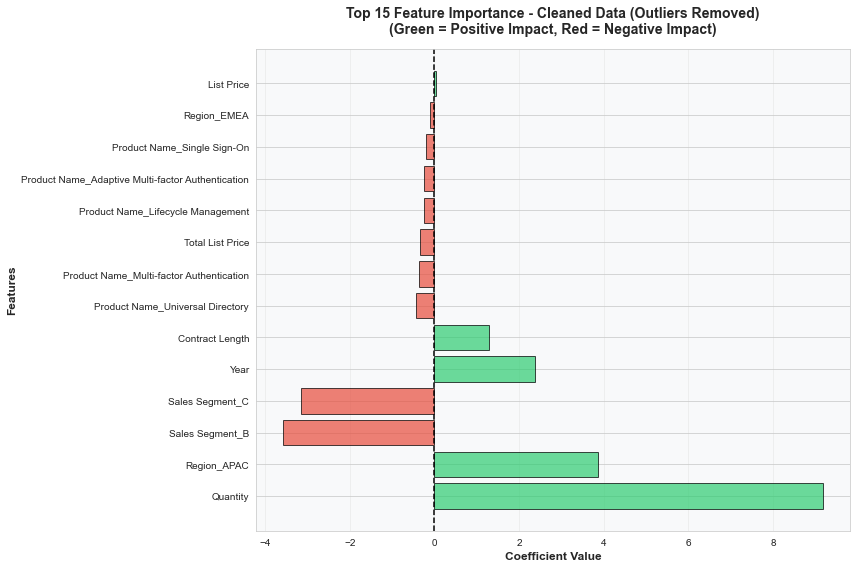

In [73]:
# Feature Importance Analysis
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': lr_model_clean.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\n" + "="*80)
print("FEATURE IMPORTANCE (Coefficients) - CLEANED DATA")
print("="*80)
print(feature_importance.head(20).to_string(index=False))

# Visualize top 15 feature importance
top_features = feature_importance.head(15)

plt.figure(figsize=(12, 8))
colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in top_features['Coefficient']]
bars = plt.barh(range(len(top_features)), top_features['Coefficient'], 
                color=colors, alpha=0.7, edgecolor='black', linewidth=1)

plt.yticks(range(len(top_features)), top_features['Feature'], fontsize=10)
plt.xlabel('Coefficient Value', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Top 15 Feature Importance - Cleaned Data (Outliers Removed)\n(Green = Positive Impact, Red = Negative Impact)', 
          fontsize=14, fontweight='bold', pad=15)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5)
plt.grid(True, alpha=0.3, axis='x')
plt.gca().set_facecolor('#f8f9fa')
plt.gcf().patch.set_facecolor('white')
plt.tight_layout()
plt.show()


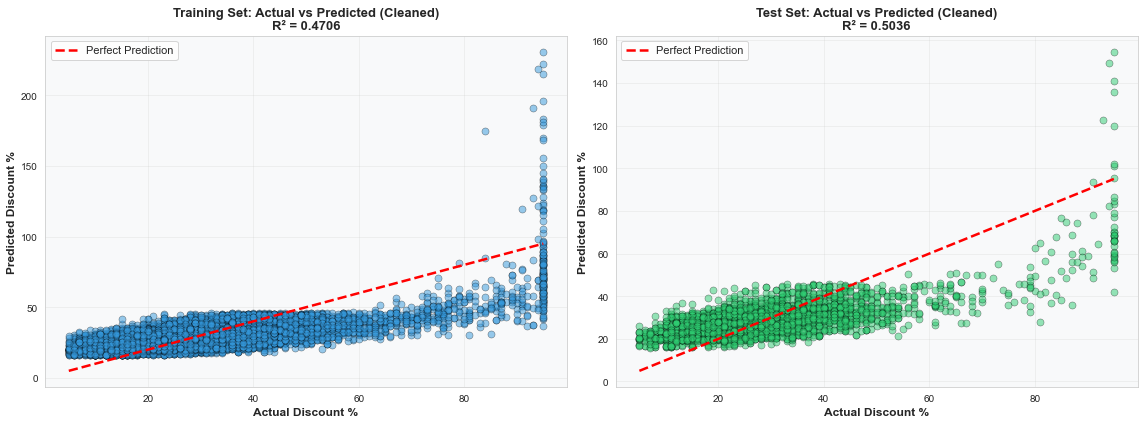

In [74]:
# Visualize Actual vs Predicted - Cleaned Model
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Training Set
axes[0].scatter(y_train, y_train_pred, alpha=0.5, s=50, color='#3498db', edgecolors='black', linewidth=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
            'r--', linewidth=2.5, label='Perfect Prediction')
axes[0].set_xlabel('Actual Discount %', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Predicted Discount %', fontsize=12, fontweight='bold')
axes[0].set_title(f'Training Set: Actual vs Predicted (Cleaned)\nR² = {train_r2:.4f}', 
                 fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_facecolor('#f8f9fa')

# Plot 2: Test Set
axes[1].scatter(y_test, y_test_pred, alpha=0.5, s=50, color='#2ecc71', edgecolors='black', linewidth=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
            'r--', linewidth=2.5, label='Perfect Prediction')
axes[1].set_xlabel('Actual Discount %', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Predicted Discount %', fontsize=12, fontweight='bold')
axes[1].set_title(f'Test Set: Actual vs Predicted (Cleaned)\nR² = {test_r2:.4f}', 
                 fontsize=13, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_facecolor('#f8f9fa')

fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()


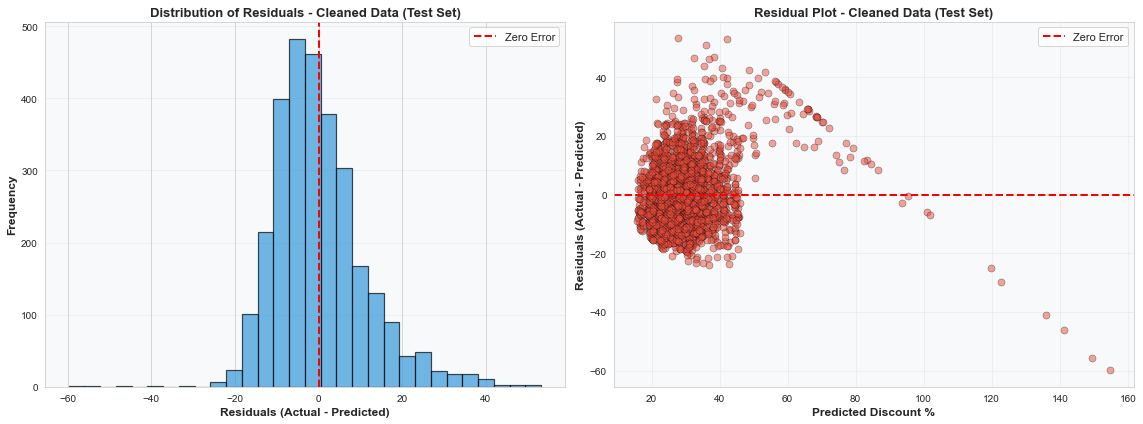


Residual Statistics - Cleaned Data (Test Set):
Mean Residual: 0.2578%
Std Dev of Residuals: 11.0054%
Min Residual: -59.7323%
Max Residual: 53.2191%


In [75]:
# Residual Analysis - Cleaned Model
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Residual Distribution
axes[0].hist(residuals_test, bins=30, color='#3498db', alpha=0.7, edgecolor='black', linewidth=1.2)
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[0].set_xlabel('Residuals (Actual - Predicted)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Residuals - Cleaned Data (Test Set)', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_facecolor('#f8f9fa')

# Plot 2: Residuals vs Predicted
axes[1].scatter(y_test_pred, residuals_test, alpha=0.5, s=50, color='#e74c3c', 
               edgecolors='black', linewidth=0.5)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[1].set_xlabel('Predicted Discount %', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Residuals (Actual - Predicted)', fontsize=12, fontweight='bold')
axes[1].set_title('Residual Plot - Cleaned Data (Test Set)', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_facecolor('#f8f9fa')

fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()

print("\nResidual Statistics - Cleaned Data (Test Set):")
print(f"Mean Residual: {residuals_test.mean():.4f}%")
print(f"Std Dev of Residuals: {residuals_test.std():.4f}%")
print(f"Min Residual: {residuals_test.min():.4f}%")
print(f"Max Residual: {residuals_test.max():.4f}%")
